Model(
  (nn1): Linear(in_features=1, out_features=15, bias=True)
  (nn2): Linear(in_features=15, out_features=1, bias=True)
)


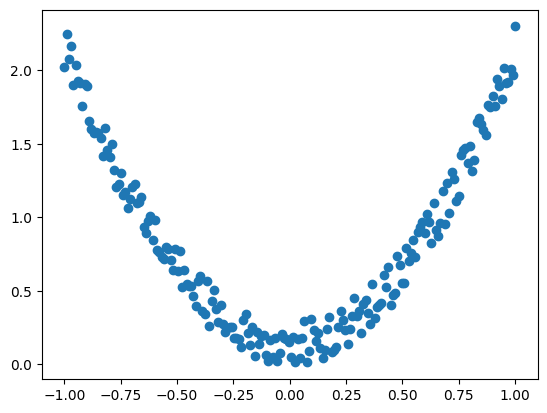

In [9]:
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.nn1 = nn.Linear(1, 15) #第一層 Linear NN
        self.nn2 = nn.Linear(15, 1) #第二層 Linear NN

    def forward(self, x):
        x = F.relu(self.nn1(x))  #對第一層 NN 使用Relu激活
        x = self.nn2(x)          #第二層直接輸出
        return x

model = Model()
print(model) #將模型print出來看看

optimizer = torch.optim.RMSprop(model.parameters(), lr=0.005)
loss_function = torch.nn.MSELoss()

X = torch.unsqueeze(torch.linspace(-1, 1, 200), dim=1)  # x data (tensor), shape=(100, 1)
Y = 2*X.pow(2) + 0.3*torch.rand(X.size())                 # noisy y data (tensor), shape=(100, 1)
plt.scatter(X.data.numpy(), Y.data.numpy())
plt.show()


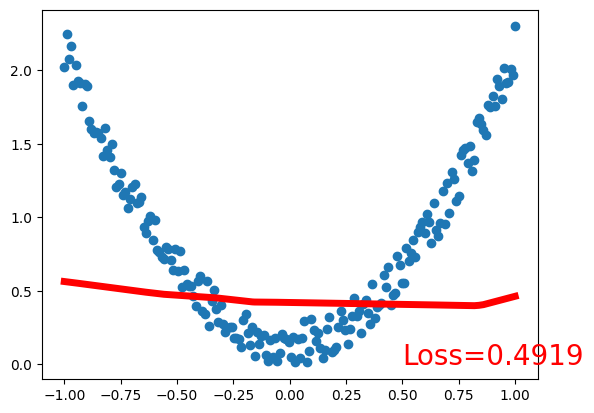

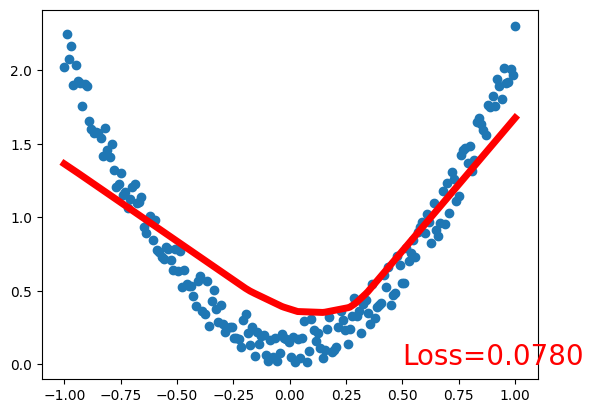

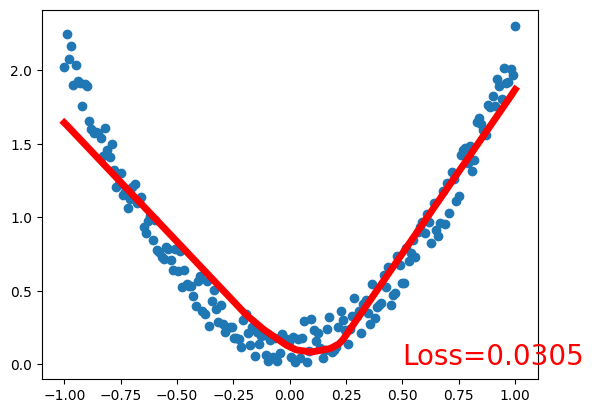

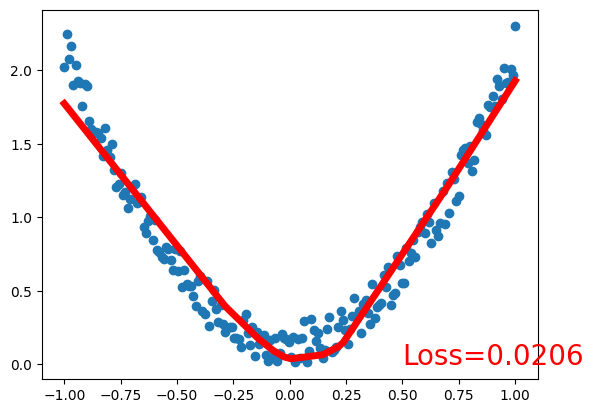

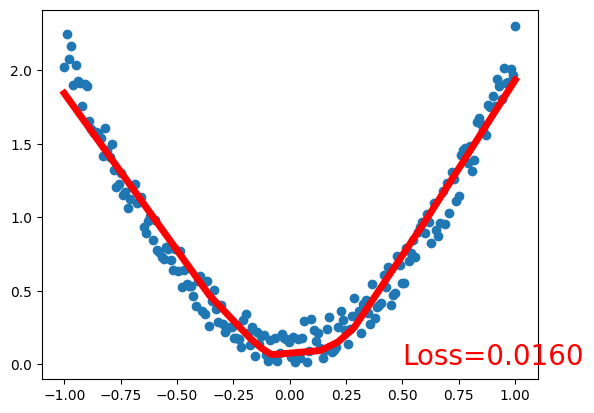

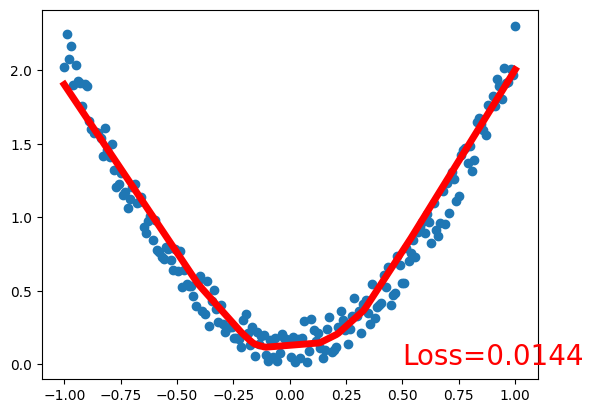

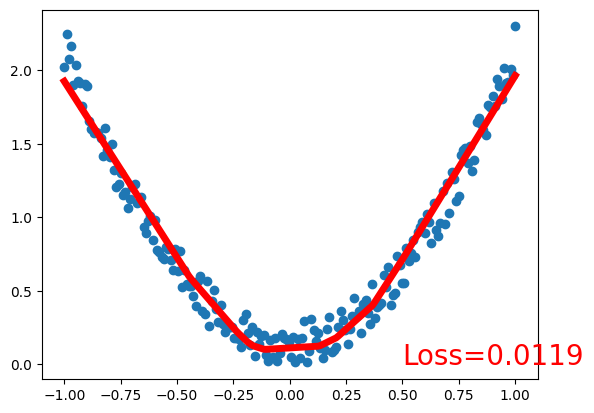

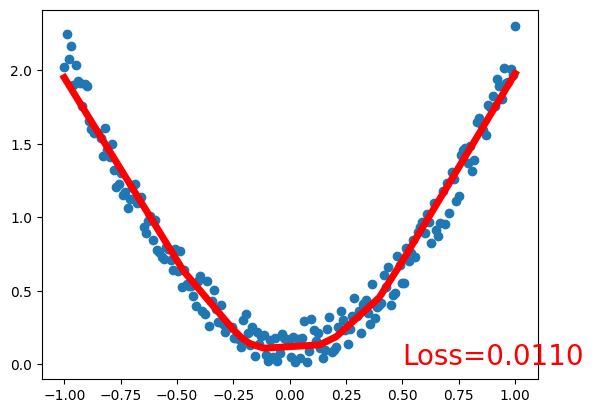

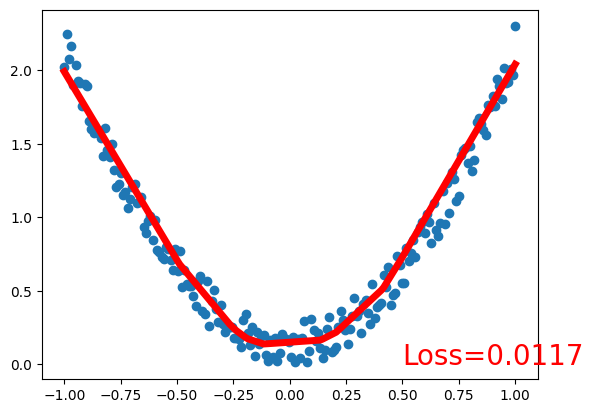

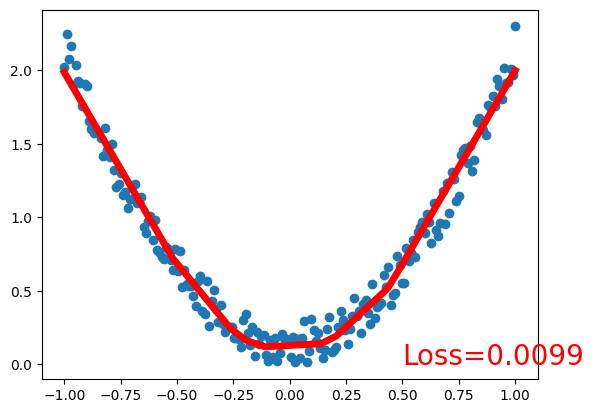

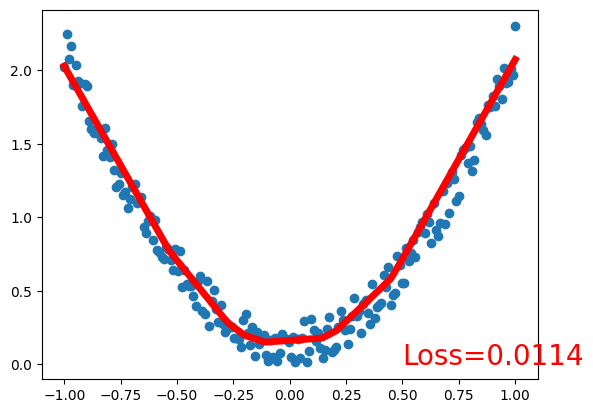

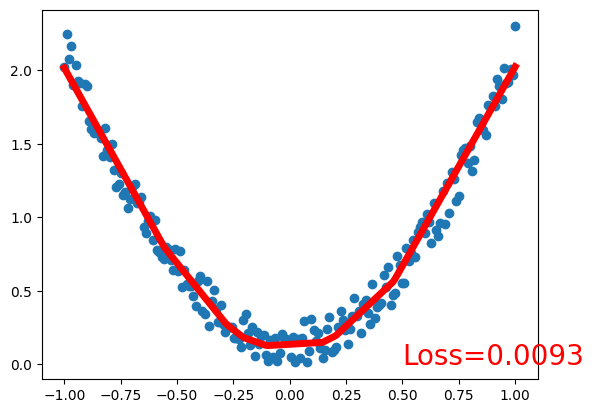

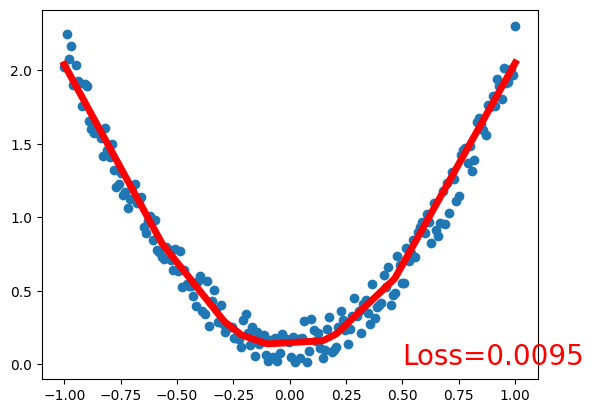

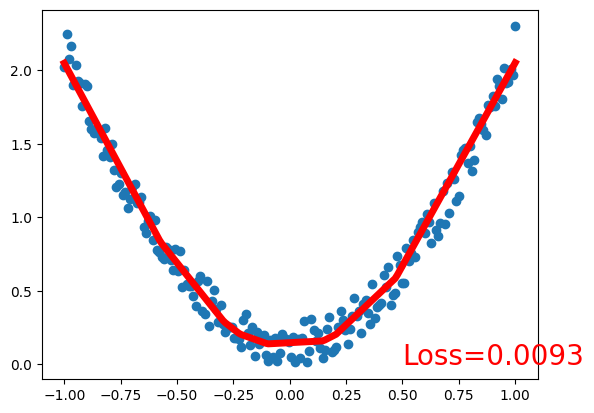

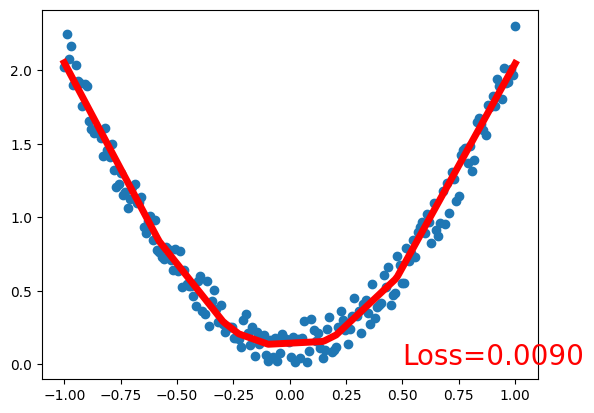

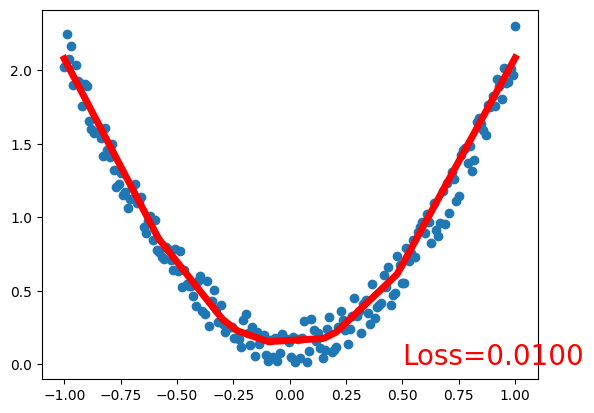

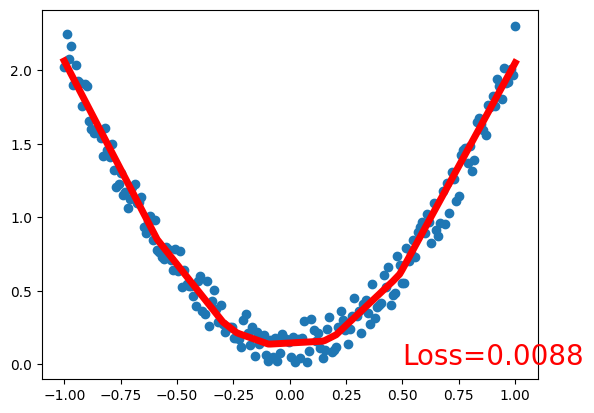

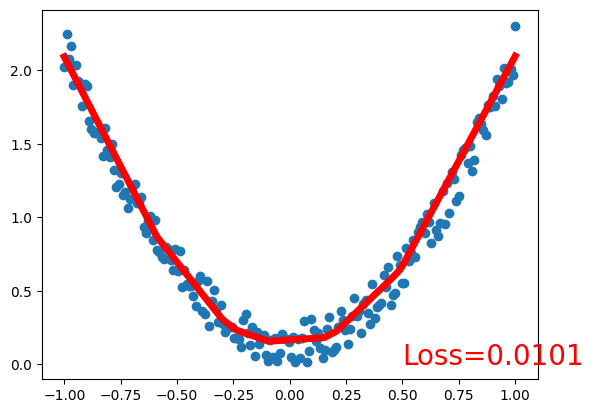

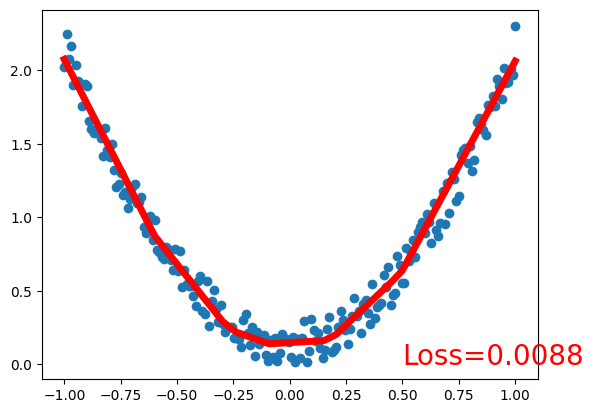

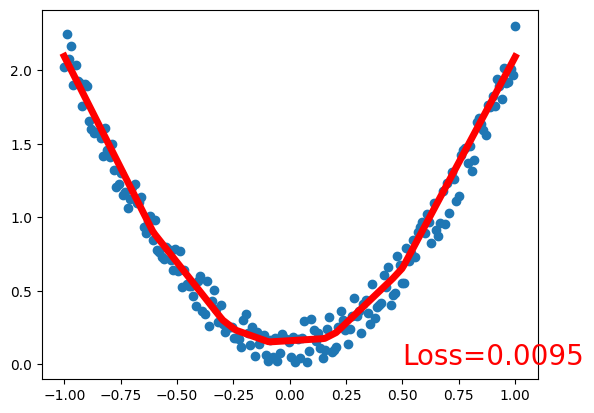

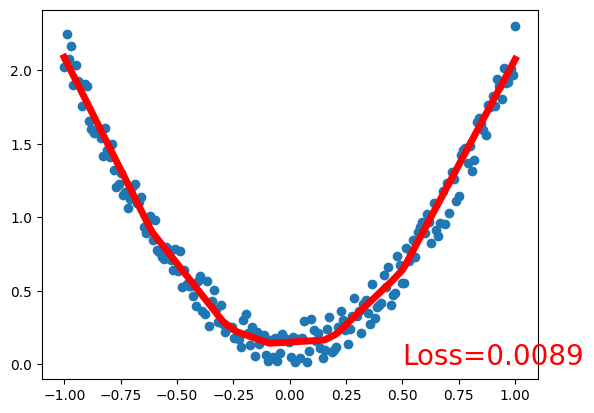

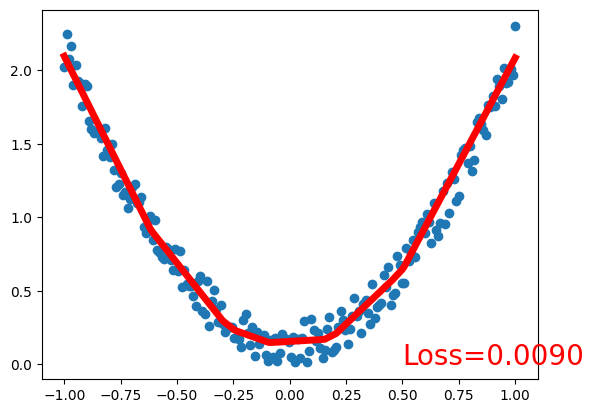

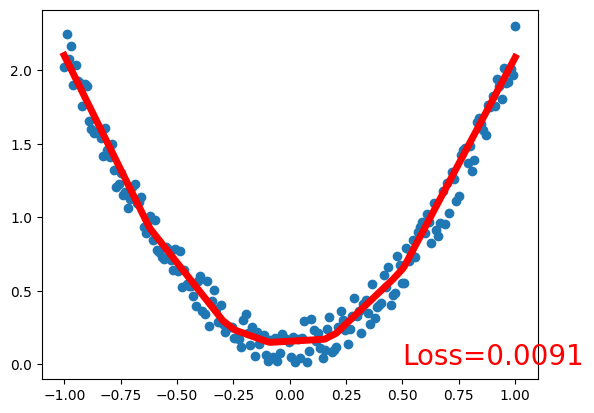

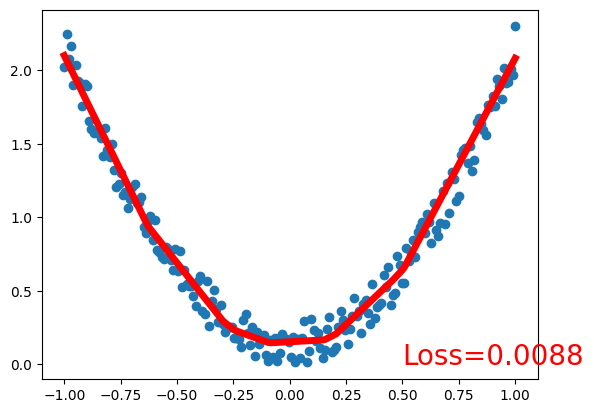

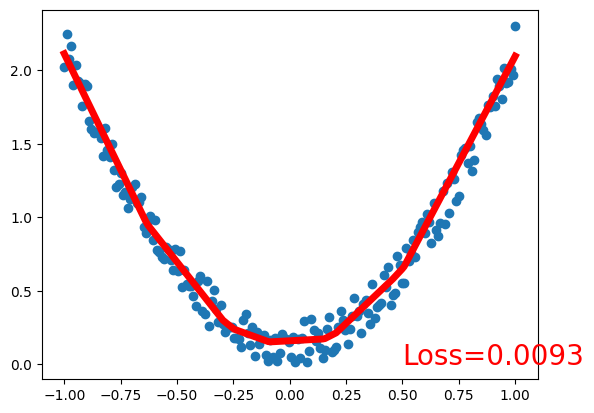

In [10]:

X=torch.Tensor(X.reshape(200,1))
Y=torch.Tensor(Y.reshape(200,1))

epochs = 500
for epoch in range(epochs):
    prediction = model(X)
    loss = loss_function(prediction, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(X.data.numpy(), Y.data.numpy())
        plt.plot(X.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        # plt.savefig('D:\\img'+'%s'%epoch+'.jpg')
        plt.pause(0.1)